# File and libraries

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_0_2024_agg_time_pre_proc.csv'

file_tag = "Google Merch Store 2024-2025"


# DSLabs functions

In [75]:
%run "scripts/dslabs_functions.py"


# Data functions

In [76]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [89]:
# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
# target='E-commerce purchases' # using for testing null values on supporting variables

target='Sessions' # the target class for project which does not contain nulls


series: Series = data[target]


test_split_threshold = 0.8

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    int64  
 1   Seven-day active users           427 non-null    int64  
 2   28-day active users              427 non-null    int64  
 3   Events per session               427 non-null    float64
 4   Add to baskets                   427 non-null    int64  
 5   Average purchase revenue         389 non-null    float64
 6   Purchase revenue                 389 non-null    float64
 7   Average session duration         427 non-null    float64
 8   ARPU                             389 non-null    float64
 9   ARPPU                            389 non-null    float64
 10  Views per user                   427 non-null    float64
 11  Total users                      427 non-null    int64  
 12  Pro

# Missing Values Analysis

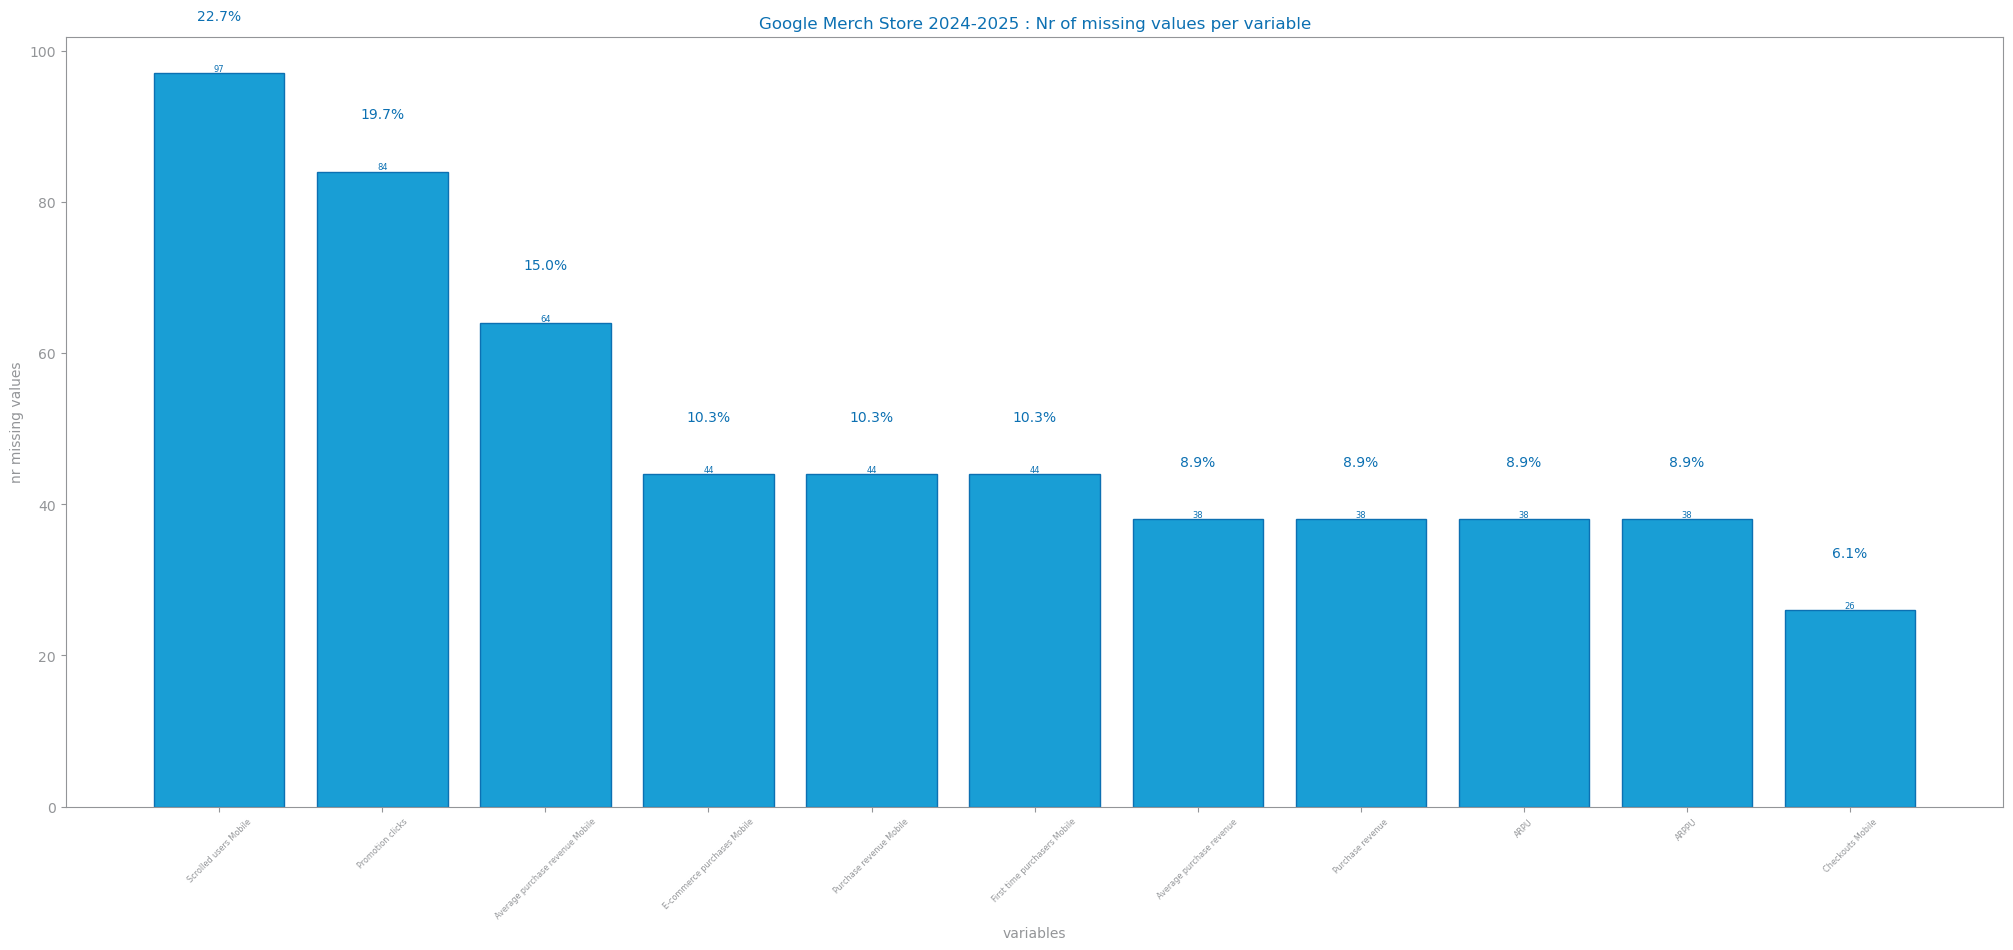

In [90]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(data)

for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

# MV 1 - ARIMA

## MV1 strategy apply

In [91]:






# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    df_copy=fill_missing_values_arima(data, freq='D')

    return df_copy

data_1=apply_strategy_1(data)

series_1: Series = data_1[target]


data_1



Filling missing values for column: Average purchase revenue
Filling missing values for column: Purchase revenue
Filling missing values for column: ARPU
Filling missing values for column: ARPPU
Filling missing values for column: Promotion clicks
Filling missing values for column: Scrolled users Mobile
Filling missing values for column: Checkouts Mobile
Filling missing values for column: E-commerce purchases Mobile
Filling missing values for column: Average purchase revenue Mobile
Filling missing values for column: Purchase revenue Mobile
Filling missing values for column: First time purchasers Mobile


,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Average purchase revenue,Purchase revenue,Average session duration,ARPU,ARPPU,...,Sessions other,Sessions referral,season,commercial_season,week_of_month,day_of_week_nr,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,982,780,780,19.948065,323,122.641143,4292.44,264.525093,5.503128,126.248235,...,0.0,50.0,0.000000,0.000000,1,3,0,0,0,0
2024-01-05,887,1433,1433,20.100338,374,189.072632,7184.76,297.290740,10.090955,194.182703,...,0.0,45.0,0.000000,0.000000,1,4,0,0,0,0
2024-01-06,426,1748,1748,16.227700,81,90.450000,723.60,219.513629,2.091329,90.450000,...,0.0,6.0,0.000000,-1.047198,1,5,1,0,0,0
2024-01-07,446,2081,2081,19.838565,126,75.339167,904.07,198.940130,2.525335,64.576429,...,0.0,11.0,0.000000,-1.047198,2,6,1,0,0,0
2024-01-08,981,2749,2749,17.174312,235,90.095238,1892.00,259.236133,2.469974,94.600000,...,0.0,56.0,0.000000,-1.047198,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,1298,7458,29843,11.164099,100,98.725000,1184.70,76.311350,0.995546,98.725000,...,0.0,39.0,1.570796,-1.047198,1,5,1,0,0,0
2025-03-02,1002,7404,29753,14.398204,118,83.159091,1829.50,176.766729,2.124855,91.475000,...,0.0,32.0,1.570796,-1.047198,2,6,1,0,0,0
2025-03-03,1451,7158,29497,18.512750,305,138.397879,4567.13,239.782187,4.170895,142.722813,...,0.0,181.0,1.570796,-1.047198,2,0,0,0,0,0


## MV1 evaluate

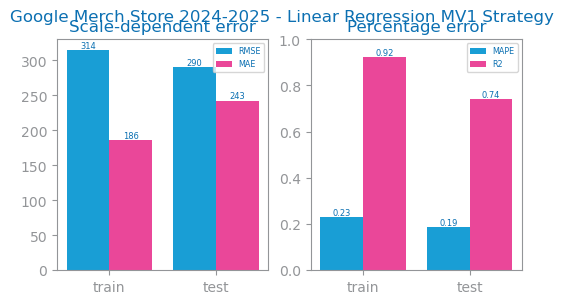

In [92]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression



# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX_1 = train_1.drop(columns=[target])
trnY_1 = train_1[target]
tstX_1 = test_1.drop(columns=[target])
tstY_1 = test_1[target]

# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)


plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression MV1 Strategy")
savefig(f"images/{file_tag}_linear_regression_eval.png")

## MV1 Plot Forecast

<Axes: xlabel='Date', ylabel='Sessions'>

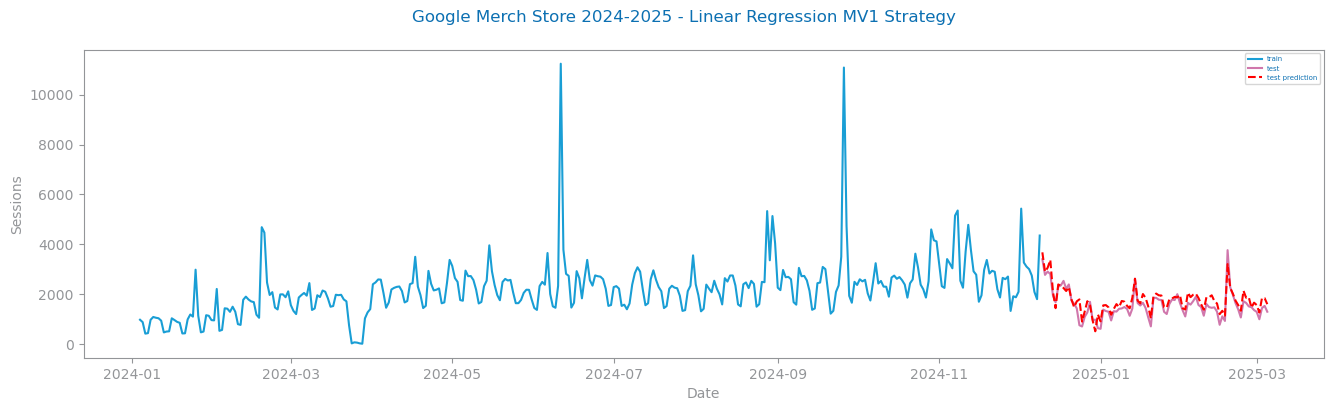

In [93]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Linear Regression MV1 Strategy",
    xlabel='Date',
    ylabel=target,
)

In [ ]:
# Cross-validation

from sklearn.model_selection import cross_val_score


cv_scores_1 = cross_val_score(model_1, trnX_1, trnY_1, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores_1}")
print(f"Mean Cross-Validation R² Score: {cv_scores_1.mean()}")


Cross-Validation R² Scores: [ 0.20860968 -2.04004613  0.57705999 -0.55828669  0.59584648]
Mean Cross-Validation R² Score: -0.2433633317821708


# MV2 - knn fill


## MV2 strategy apply

In [95]:
def apply_strategy_2(df):


    df_copy = mvi_by_filling(df, strategy='knn')

    return df_copy

data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

## MV2 evaluate

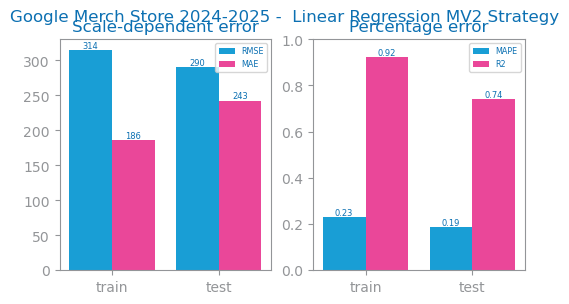

In [96]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX_2 = train_2.drop(columns=[target])
trnY_2 = train_2[target]
tstX_2 = test_2.drop(columns=[target])
tstY_2 = test_2[target]

# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)


# Plot the forecasting evaluation
plot_forecasting_eval(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} -  Linear Regression MV2 Strategy")
savefig(f"images/{file_tag}_linear_regression_eval.png")

In [97]:
# Cross-validation

from sklearn.model_selection import cross_val_score


cv_scores_2 = cross_val_score(model_2, trnX_2, trnY_2, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores_2}")
print(f"Mean Cross-Validation R² Score: {cv_scores_2.mean()}")

Cross-Validation R² Scores: [ 0.20860968 -2.04004613  0.57705999 -0.55828669  0.59584648]
Mean Cross-Validation R² Score: -0.2433633317821708


## MV2 Plot Forecast

<Axes: xlabel='Date', ylabel='Sessions'>

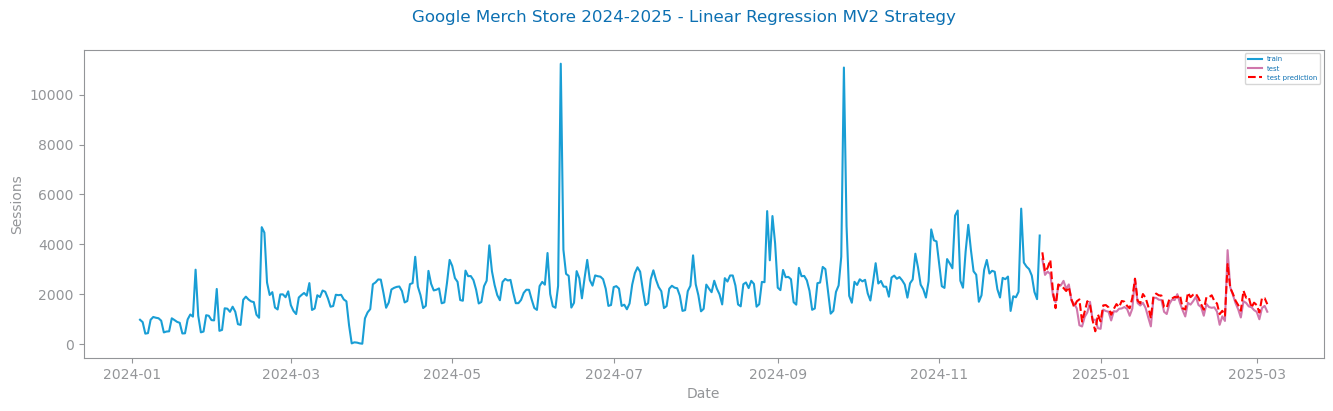

In [98]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - Linear Regression MV2 Strategy",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


# Calculate performance metrics for each model
metrics = {
    "Model": ["Arima MV input", "KNN MV input"],
    "MAE": [
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2)
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

            Model         MAE           MSE        RMSE        R²       MAPE
0  Arima MV input  242.594651  84304.572977  290.352498  0.739458  18.751332
1    KNN MV input  242.594651  84304.572977  290.352498  0.739458  18.751332


# save to csv

In [100]:

if test_data==False:
    
    data_copy=data.copy()
    
    
    data_copy=apply_strategy_2(data_copy)
    
    data_copy.reset_index(inplace=True)
    
    
    data_copy.to_csv(f"data/df_merch_0_2024_agg_time_mv_input.csv", index=False)
    